# Dependências

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Configurações

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [ ]:
voc = ["EU", "VOCÊ", "É", "SOU", "MUITO", "LEGAL", "DEMAIS", "INCRÍVEL"]

def encode(text):
  a_text = text.split(" ")
  r = []
  for i in a_text:
    if i in voc:
      r.append(voc.index(i))
  return np.array(r)


def decode(a_text):
  return voc[np.argmax(a_text)]

# Dataset

In [ ]:
data = np.array([
    encode("EU SOU MUITO LEGAL"),
    encode("MUITO LEGAL EU SOU"),
    encode("EU SOU LEGAL DEMAIS"),
    encode("VOCÊ É MUITO LEGAL"),
    encode("VOCÊ É LEGAL DEMAIS")
    ])

targets = data[:,-1]
inputs = data[:,0:3]

print(f"Inputs: \n{inputs}")
print(f"Targets: \n{targets}")

# Arquitetura (INCOMPLETA)

In [ ]:
model = Sequential()
###### COMPLETE AQUI A ARQUITETURA DA REDE
model.add(Dense(len(voc), activation='softmax'))

# Compile o modelo
learning_rate = 0.1
#adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy')

# Imprime a arquitetura
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Treinamento

In [ ]:
# Hiperparâmetros
epochs = 500

# Treine o modelo
log = model.fit(inputs, targets, epochs=epochs)

In [ ]:
losses = log.history["loss"]
data_epochs = np.arange(0, epochs, 1)

plt.plot(data_epochs, losses, color="yellow", lw=5, label = 'Cross Entropy')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Teste

In [ ]:
# Testa a previsão com uma nova sequência
#test_sequence = [1, 0, 1]

text = "EU SOU MUITO" #Valor conhecido
# text = "VOCÊ É INCRÍVEL" #valor desconhecido
# text = "SOU MUITO INCRÍVEL" #valor desconhecido meio provável
# text = "VOCÊ É EU" #valor desconhecido improvável
# text = "EU SOU É" #valor desconhecido improvável

test_sequence = encode(text)
predicted_output = model.predict(np.array([test_sequence]))

print(f"Vocabulário: {voc}")
print()
print(f"Frases conhecidas:\n")

for i in range(len(inputs)):
    s = ""
    for j in inputs[i]:
      s += voc[j] +" "
    print(f"{s}{decode(targets[i])}")

print()

print(f"Sequência de entrada: {test_sequence}")
print(f"Sequência prevista: {predicted_output}")
print()

print(f"Texto de entrada: {text} ...")
print(f"Texto de saída: {text} {decode(predicted_output)}. ({np.max(predicted_output)})")


# Questões

1. Complete a arquitetura da rede para gerar este diagrama:


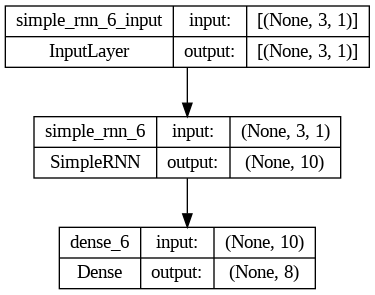